# RNN NETWORKS

# RNN

**RNN(Recurrent Neural Network):**

- A Recurrent Neural Network is a specialy type of ANN(Artificial Neural Network) that has the ability to remember the past incidents due to its internal memory feature in its architecture.

- In the conventional ANN the inputs and outputs are independent of each other but here in this case of RNN the outputs are **dependent on the previous elements in a sequence of text.**

- For eg: If we have a neuron I0 having A, I1 as boy then this will help to predict the next appropriate word in the sequence.

<figure>
<img src= "./res/05_1_rnn.jpg" style="width:100%">
<figcaption align = "center"><b>Fig.1 -  RNN Network Architecture</b></figcaption>
</figure>


Now lets see how the RNN network works.

# WORKING OF RNN

- In RNN network the information cycles as a loop between states so the outputs here is dependent on the previous inputs.

- For eg: For a neural network there is an input X and and that input is then passed into a middle hidden layer A which will have lots of weights, biases and activation functions in it.

- Here in this case the parameters are standaradized (i.e.,) the parameters are made to be the same as all over the layer in the network.

- The parameters are standardized because by this there is no need to create multiple layers instead a single layer can be iterated multiple times.

<figure>
<img src= "./res/05_3_rnn_work.png" style="width:100%">
<figcaption align = "center"><b>Fig.3 -  RNN Working Architecture</b></figcaption>
</figure>

## BACKPROPAGATION IN RNN

- Unlike the traditional backpropagation in ANN, here RNN uses a special type of backpropagation in **time domain** called **backpropagation through time(BPTT)**.

**BPTT:**

- It is slightly different from traditional backpropagation as this backpropagation is specific to sequence data.

- The principles of backpropagation through time is the same as traditional propagation where the model calculates error from the output layer to input layer and updates the wi=eights and biases accordingly.

 - The difference is that in RNN BPTT **sums the error at each timestep** while in FFNN they do not need to sum the error at each timestep because they do not share information throughout the network

# TYPES OF RNN

RNN is classified into four main types based on the number of inputs and outputs. They are:

- One-to-One RNN
- Many-to-One RNN
- One-to-Many RNN
- Many-to-Many RNN

**One-to-One RNN:** Single input and single output.

**Many-to-One RNN:** Single input and multiple outputs. Can be used for classification.

**One-to-Many RNN:** Multiple inputs and single output. Can be used to generate text for a given word or image.

**Many-to-Many RNN:** Multiple inputs and multiple outputs. Can be used for translation.

# DIFFERENCE BETWEEN RNN, CNN AND FFNN

| RNN | CNN | FFNN |
| ---- | ---- | ---- |
| Can handle sequential data | Cannot handle sequential data | Cannot handle sequential data |
| No restriction in length of inputs and outputs | Finite inputs and outputs | Finite inputs and outputs |
| Applicable for sequence data such as text and time series data | Applicable for sparse data like images | Applicable for tabular data |
| BPTT | Simple backpropagation | Simple backpropagation |
| Used for Time Series, Speech and Text Processing | Used for Image Processing | Used for Classification |

# ADVANTAGES AND DISADVANTAGES OF RNN

**Advantages:**

- With increase in size of data, model size wont increase.

- RNN can process inputs of any length, there is no restriction on the length of inputs.

- Because of the ability to remember the past, RNN can be used for NLP and Time Series tasks.

**Disadvantages:**

- Vanishing gradient problem.

- Exploding gradient problem.

- Difficult to process long sequences.

- Slow and complex architecture to train.

# VARIANTS OF RNN

Some of the variants of RNN are:

- Vanilla RNN
- LSTM
- GRU
- Bidirectional RNN
- Bidirectional LSTM
- Stacked RNN
- Stacked LSTM
- Peephole connection

We will see these in details in the subsequent sections. Before moving into variants of RNN lets see how to implement RNN network using the two famous deep learning frameworks: **Tensorflow and Pytorch**.

# IMPLEMENTING RNN NETWORKS

## Importing the necessary libraries


In [1]:
import numpy as np
import tensorflow as tf # pip install tensorflow or tensorflow-gpu if gpu available
import tensorflow_datasets as tfds  # pip install tensorflow-datasets

c:\Users\Vasanth\anaconda3\envs\oneneuronnlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting the data input pipeline

### DOWNLOADING THE DATA

In [2]:
def tf_build_data(data_name):
    '''
    This function is used to load the data from the tensorflow datasets for a given data id and
    then return the outputs as train_dataset and test_dataset.

    Parameters:
    data_name: The name(id) of the dataset to be loaded.
    
    Returns:
    info: The information of the dataset.
    train_dataset: The training dataset.
    test_dataset: The testing dataset.  '''

    dataset, info = tfds.load(data_name, with_info=True,
                          as_supervised=True)
    train_dataset, test_dataset = dataset['train'], dataset['test']

    return info, train_dataset, test_dataset

info, train_data, test_data = tf_build_data('imdb_reviews')
train_data.element_spec # This will show the specifications of the data like the shape of the data

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [3]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\Vasanth\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train

In [4]:
print(type(train_data))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


So here we are able to see that the train data contains an object of type **PrefetchDataset**. Inside this object there is two columns of data as tensors where the first column has data of type **tf.string** and the second column has data of type **tf.int64**. Now lets see an example of data from the data object.

In [5]:
def tf_show_data(count):
    '''
    This function is used to show the number of datas for a given count by users in a given dataset.

    Parameters:
    count: The number of data to be shown.
    
    Prints:
    The data in the dataset for the given count. '''
    for example, label in train_data.take(count):
        print('text: ', example.numpy())
        print('label: ', label.numpy())
tf_show_data(3)

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0
text:  b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. 

### SHUFFLING AND BATCHING THE DATA

In [6]:
SHUFFLE_SIZE = 10000 
BATCH_SIZE = 64

In [7]:
def tf_shuffle_batch_data(train_data, test_data, buffer_size=SHUFFLE_SIZE, batch_size=BATCH_SIZE):
    '''
    This function is used to shuffle and batch the data for a given dataset.

    Parameters:
    train_data : Training dataset
    test_data : Testing dataset
    buffer_size : The size of the buffer to shuffle the data
    batch_size : The size of the batch to be returned

    Returns:
    train_data : Shuffled and Batched Training dataset
    test_data : Shuffled and Batched Testing dataset '''

    train_data = train_data.shuffle(buffer_size).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
    test_data = test_data.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

    return train_data, test_data

train_data, test_data = tf_shuffle_batch_data(train_data, test_data)

Here prefetch function of tf.data API is called. 

**What is prefetch?**

**From tensorflow:**
Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

The tf.data API provides the tf.data.Dataset.prefetch transformation. It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.


In [8]:
for example, label in train_data.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"This was a nice attempt at something but it is too pretentious and boring to rise above it's low budget trappings. The use of virtual sets almost works but at some points it fails miserably. They made good use of the small budget I guess. I just wish the story and most of the acting was better. There are a lot of parts where you see what they were aiming for and it would of been great if they actually hit those marks but they don't. Confusing and unbelievable story. Bad DVD transfer too. It doesn't take much for me to watch a movie in one sitting. This I had to shut off. It was too boring. I can do slow movies. But just make them appealing in some aspect. Visually, story-wise, acting, etc. This was lacking in all departments so it never added up to an engrossing experience. Maybe the film maker's next attempt will be better."
 b"The movie was gripping from start to finish and its b/w photography of the American heartland is stunning. We feel we are right there with them as t

### ENCODING THE DATA(VECTORIZING)

In [9]:
def tf_encode_text(text_dataset, vocab_size):
    '''
    This function is used to encode the text in a given dataset.

    Here for the Vectorization process we will use TextVectorization layer from tf.keras API which
    will take VOCAB_SIZE as its value for map_tokens parameter. 

    This layer itself will perform the tokenization process and will vectorize the data as well.


    Parameters:
    text_dataset: The dataset to be encoded
    vocab_size: The size of the vocabulary

    Returns:
    encoded_text: The encoded dataset '''

    encoder = tf.keras.layers.TextVectorization(
        max_tokens=vocab_size)
    encoder.adapt(text_dataset.map(lambda text, label: text))
    return encoder

VOCAB_SIZE = 1000
encoder = tf_encode_text(train_data, vocab_size=VOCAB_SIZE)

The default value for preprocessing.TextVectorization's standardize argument is **"lower_and_strip_punctuation"**.
The **.adapt method sets the layer's vocabulary**. After the padding and unknown tokens they're **sorted by frequency**. Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are **0-padded to the longest sequence in the batch** unless and until a fixed **output_sequence_length** is specified.

In [10]:
vocab = np.array(encoder.get_vocabulary())
print("Vocabulary: {}".format(vocab))
encoded_train_data_example = encoder(example)[:3].numpy()
print("Encoded train data example: {}".format(encoded_train_data_example))

Vocabulary: ['' '[UNK]' 'the' 'and' 'a' 'of' 'to' 'is' 'in' 'it' 'i' 'this' 'that'
 'br' 'was' 'as' 'for' 'with' 'movie' 'but' 'film' 'on' 'not' 'you' 'are'
 'his' 'have' 'he' 'be' 'one' 'its' 'at' 'all' 'by' 'an' 'they' 'from'
 'who' 'so' 'like' 'her' 'just' 'or' 'about' 'has' 'if' 'out' 'some'
 'there' 'what' 'good' 'when' 'more' 'very' 'even' 'she' 'my' 'no' 'up'
 'would' 'which' 'only' 'time' 'really' 'story' 'their' 'were' 'had' 'see'
 'can' 'me' 'than' 'we' 'much' 'well' 'been' 'get' 'will' 'into' 'also'
 'because' 'other' 'do' 'people' 'bad' 'great' 'first' 'how' 'most' 'him'
 'dont' 'made' 'then' 'movies' 'make' 'could' 'films' 'way' 'them' 'any'
 'too' 'after' 'characters' 'think' 'watch' 'two' 'many' 'being' 'seen'
 'character' 'never' 'little' 'acting' 'where' 'plot' 'best' 'love' 'did'
 'know' 'life' 'show' 'does' 'ever' 'your' 'still' 'better' 'over' 'off'
 'these' 'end' 'say' 'while' 'here' 'man' 'why' 'scene' 'such' 'scenes'
 'go' 'should' 'something' 'through' 'im' 'bac

In [11]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_train_data_example[n]]))
  print()

Original:  b"This was a nice attempt at something but it is too pretentious and boring to rise above it's low budget trappings. The use of virtual sets almost works but at some points it fails miserably. They made good use of the small budget I guess. I just wish the story and most of the acting was better. There are a lot of parts where you see what they were aiming for and it would of been great if they actually hit those marks but they don't. Confusing and unbelievable story. Bad DVD transfer too. It doesn't take much for me to watch a movie in one sitting. This I had to shut off. It was too boring. I can do slow movies. But just make them appealing in some aspect. Visually, story-wise, acting, etc. This was lacking in all departments so it never added up to an engrossing experience. Maybe the film maker's next attempt will be better."
Round-trip:  this was a nice attempt at something but it is too [UNK] and boring to [UNK] above its low budget [UNK] the use of [UNK] sets almost wor

# RNN

## Model Creation

**Steps to create a RNN model using Tensorflow:**

1. Create a model using ``tf.keras.Sequential``
2. The first layer inside this Sequential model is a ``tf.keras.layers.Embedding`` layer to embed the input sequence of vectors.
3. Then add subsequent number of ``tf.keras.RNN`` layers to your choice.
4. Add a ``tf.keras.layers.Dense`` layer to the end of your model which has the number of units equal to the number of classes and will be used as the output layer.

In [12]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
sample_text = ('The movie was cool.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.03948397]


## Compiling and Training the Model

### COMPILING THE MODEL

In [14]:
def tf_compile_model(
    model, 
    loss_fn = tf.keras.losses.BinaryCrossentropy(), 
    optimizer_fn = tf.keras.optimizers.Adam(learning_rate=1e-3), 
    metric = "accuracy"):
    '''
    This function is used to compile the model for a given loss and optimizer.

    Parameters:
    loss: The loss function to be used for training. Default : BinaryCrossentropy()
    optimizer: The optimizer to be used for training. Default : Adam(learning_rate=2e-5)
    metric: The metric to be used for training. Default : accuracy

    Returns:
    model: The compiled model ready for training'''

    compile_model = model
    compile_model.compile(loss=loss_fn
    , optimizer=optimizer_fn, metrics=[metric])
    return compile_model

model = tf_compile_model(model)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

Here is the summary of model that shows the number of parameters in the model along with layers and their shape

### TRAINING THE MODEL

In [16]:
def tf_train_rnn(validation_data, epochs=3, validation_steps=15):
    '''
    This function is used to train the model for a given epochs and validation steps.

    Parameters:
    validation_data: The validation dataset
    epochs: The number of epochs to be used for training
    validation_steps: The number of steps to be used for validation

    Returns:
    history: The history of the training process'''

    history = model.fit(train_data, epochs=epochs, validation_data=validation_data, validation_steps=validation_steps)
    return history

In [17]:
train_history = tf_train_rnn(test_data)

Epoch 1/3
390/390 [==============================] - 531s 1s/step - loss: 0.8357 - accuracy: 0.5658 - val_loss: 0.6295 - val_accuracy: 0.6479
Epoch 2/3
390/390 [==============================] - 542s 1s/step - loss: 0.6433 - accuracy: 0.6391 - val_loss: 0.6826 - val_accuracy: 0.5542
Epoch 3/3
390/390 [==============================] - 534s 1s/step - loss: 0.6676 - accuracy: 0.5996 - val_loss: 0.6049 - val_accuracy: 0.6667


## Predicting the sentiment

In [20]:
def tf_predict(predict_text):
    '''
    This function is used to predict the sentiment of a given text.

    Parameters:
    predict_text: The text to be predicted

    Returns:
    prediction: The prediction of the text if it is positive or negative
    prediction_confidence: The confidence of the prediction'''

    prediction_confidence = model.predict(np.array([predict_text]))
    if prediction_confidence[0] >= 0.0:
        prediction = "positive"
    else:
        prediction = "negative"
    return prediction, prediction_confidence[0]
print(tf_predict("This movie was good"))
print(tf_predict("This movie was bad"))

('positive', array([0.2790428], dtype=float32))
('positive', array([0.1142449], dtype=float32))


## Plotting the Accuracy and Loss Curves

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    '''
    This is a helper function is used to plot the graph of the given metric.
    
    Parameters:
    history: The history of the training process
    metric: The metric to be plotted
    
    Returns:
    None
    
    Plots:
    The graph of the given metric'''

    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

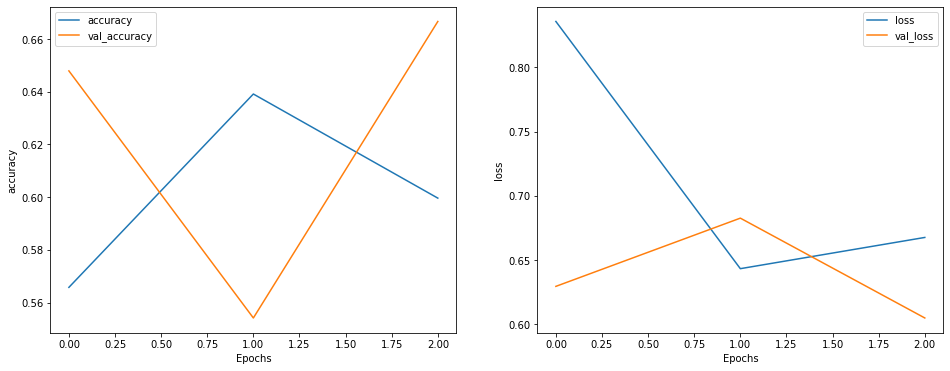

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(train_history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(train_history, 'loss')

# LSTM